<a href="https://colab.research.google.com/github/janaswamirishi1999/Technocolabs-ML1/blob/main/toxic_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
# Packages : 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import collections
import wordcloud
import re
import logging
import itertools
import unicodedata
import string
#import contractions
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import defaultdict
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS 
from textblob import TextBlob

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

train = pd.read_csv('/content/drive/MyDrive/2006/train1.csv' )

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
train.info()
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
print( train.columns)
print( train.shape)
train.head()


Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')
(159571, 8)


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [ ]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
for i in ['toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate']:
    print("{} :".format(i.upper()))
    print(train.loc[train[i]==1, 'comment_text'].sample().values, "\n")

TOXIC :
['How many times did your father fuck you in the ass, Sullenspice?'] 

SEVERE_TOXIC :
["RETARD \n\nI'ts my flippen opinion anyways and how about get a life intead of reporting peoplego get laid you stupid gay virgin"] 

OBSCENE :
['"\n\n Funny usage? \n\nThere used to be a very amusing and funny example of the usage of the word ""fuck"" in place of almost every part of speach in a sentence. Where did it go? I do not exactly remember it but I think it should be brought back.  "'] 

THREAT :
["If you don't let me post, I will fuck you up"] 

INSULT :
['YOU SHOULD ALL RUE THE DAY YOU WERE BORN!!!! I HAVE TAKEN OVER THIS PAGE!!!! I AM THE GOD OF CHOCOBOS, I WANT MY CHEESE, GEORGE BUSH SHOULD GO TO HELL!!!!!!!!! I AM THE GOD OF CHOCOBOS, I WANT MY CHEESE, GEORGE BUSH SHOULD GO TO HELL!!!!!!!!! I AM THE GOD OF CHOCOBOS, I WANT MY CHEESE, GEORGE BUSH SHOULD GO TO HELL!!!!!!!!! I AM THE GOD OF CHOCOBOS, I WANT MY CHEESE, GEORGE BUSH SHOULD GO TO HELL!!!!!!!!! I AM THE GOD OF CHOCOBOS, 

In [6]:
## Visualization - EDA :

def category_percentage(train):
    train['clean'] = np.where((train['toxic']==0) & (train['severe_toxic']==0) & (train['obscene']==0) & (train['threat']==0) & (train['insult']==0) & (train['identity_hate']==0), 1,0)
    
    categories = ['toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate', 'clean']
    train['clean'] = np.where((train['toxic']==0) & (train['severe_toxic']==0) & (train['obscene']==0) & (train['threat']==0) & (train['insult']==0) & (train['identity_hate']==0), 1,0)
    plot_data = train[categories].mean()*100

    plt.figure(figsize=(10,5))
    plt.title("percentage records by category")
    sns.barplot(x=plot_data.index, y = plot_data.values)
    plt.show()
    
    return
    def box_plot_text_len(train):
      train['comment_length'] = train['comment_text'].apply(lambda x : len(x.split()))
    toxic = train[train['toxic']==1]['comment_length'].values
    severe_toxic = train[train['severe_toxic']==1]['comment_length'].values
    obscene = train[train['obscene']==1]['comment_length'].values
    threat = train[train['threat']==1]['comment_length'].values
    insult = train[train['insult']==1]['comment_length'].values
    identity_hate = train[train['identity_hate']==1]['comment_length'].values
    clean = train[(train['toxic']==0) & (train['severe_toxic']==0) & (train['obscene']==0) & (train['threat']==0) & (train['insult']==0) & (train['identity_hate']==0)]['comment_length'].values

    fig = go.Figure()
    fig.add_trace(go.Box(y=toxic,name="toxic",jitter=0.3,pointpos=-1.8,boxpoints='all'))
    fig.add_trace(go.Box(y=severe_toxic,name="severe_toxic",jitter=0.3,pointpos=-1.8,boxpoints='all'))
    fig.add_trace(go.Box(y=obscene,name="obscene",jitter=0.3,pointpos=-1.8,boxpoints='all'))
    fig.add_trace(go.Box(y=threat,name="threat",jitter=0.3,pointpos=-1.8,boxpoints='all'))
    fig.add_trace(go.Box(y=insult,name="insult",jitter=0.3,pointpos=-1.8,boxpoints='all'))
    fig.add_trace(go.Box(y=identity_hate,name="identity_hate",jitter=0.3,pointpos=-1.8,boxpoints='all'))
    fig.add_trace(go.Box(y=clean,name="clean",jitter=0.3,pointpos=-1.8,boxpoints='all'))

    fig.show()
    return 

def text_length_across_classes(train):
    train['comment_length'] = train['comment_text'].apply(lambda x : len(x.split()))
    
    mean_text_len = []
    min_text_len = []
    max_text_len = []
    median_text_len = []
    for i in ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']:
        mean_text_len.append(train[train[i]==1]['comment_length'].mean())  
        min_text_len.append(train[train[i]==1]['comment_length'].min())  
        max_text_len.append(train[train[i]==1]['comment_length'].max())  
        median_text_len.append(train[train[i]==1]['comment_length'].median())  
    mean_text_len.append(train[(train['toxic']==0) & (train['severe_toxic']==0) & (train['obscene']==0) & (train['threat']==0) & (train['insult']==0) & (train['identity_hate']==0)]['comment_length'].mean())
    min_text_len.append(train[(train['toxic']==0) & (train['severe_toxic']==0) & (train['obscene']==0) & (train['threat']==0) & (train['insult']==0) & (train['identity_hate']==0)]['comment_length'].min())
    max_text_len.append(train[(train['toxic']==0) & (train['severe_toxic']==0) & (train['obscene']==0) & (train['threat']==0) & (train['insult']==0) & (train['identity_hate']==0)]['comment_length'].max())
    median_text_len.append(train[(train['toxic']==0) & (train['severe_toxic']==0) & (train['obscene']==0) & (train['threat']==0) & (train['insult']==0) & (train['identity_hate']==0)]['comment_length'].median())
    
    for j in ['mean', 'min', 'max', 'median']:
        if j == 'mean': 
            len_data = mean_text_len
        elif j =='max':
            len_data = max_text_len
        elif j == 'min':
            len_data = min_text_len
        else:
            len_data = median_text_len
        
        plt.figure(figsize=(10,5))
        plt.title('{} text length'.format(j))
        sns.barplot(x = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate','clean'],
            y = len_data)
        plt.show()
    
    return

    def corr_between_labels(train):
      plt.figure(figsize=(15,8))
    plt.title("correlation between toxic categories")
    sns.heatmap(train.corr(),cmap='YlGnBu',annot=True)
    plt.show()
    return 

## Gram statistics
def gram_analysis(data,gram):
    stop_words_set = set(stopwords.words('english'))
    tokens=[t for t in data.lower().split(" ") if t!="" if t not in stop_words_set]
    ngrams=zip(*[tokens[i:] for i in range(gram)])
    final_tokens=[" ".join(z) for z in ngrams]
    return final_tokens

    def gram_freq(train, gram, categ_col, text_col):
      category_text = " ".join(train[train[categ_col]==1][text_col].sample(200).values)
    toks = gram_analysis(category_text, gram)
    tok_freq = pd.DataFrame(data=[toks, np.ones(len(toks))]).T.groupby(0).sum().reset_index()
    tok_freq.columns = ['token','frequency']
    tok_freq = tok_freq.sort_values(by='frequency',ascending=False)
    
    plt.figure(figsize=(15,8))
    plt.title("{} most common tokens".format(categ_col))
    sns.barplot(x='token', y='frequency', data=tok_freq.iloc[:30])
    plt.xticks(rotation=90)
    plt.show()
    
    return

     # word distribution across categories:

    def avg_word_len_plot(train):
      train['punct_count'] = train['comment_text'].apply(lambda x : len([a for a in x if a in string.punctuation]))
    train['avg_word_length'] = train['comment_text'].apply(lambda x : np.round(np.mean([len(a) for a in x.split()])))
    
    clean = train[train['clean']==1].avg_word_length.value_counts().reset_index()
    clean.columns = ['len', 'freq']
    clean = clean.sort_values(by='len')
    plt.figure(figsize=(20,7))
    plt.title("clean comments avg word length")
    sns.barplot(x=clean.len, y=clean.freq)
    plt.xticks(rotation = 90)
    plt.show()

    toxic = train[train['clean']==0].avg_word_length.value_counts().reset_index()
    toxic.columns = ['len', 'freq']
    toxic = toxic.sort_values(by='len')
    plt.figure(figsize=(20,7))
    plt.title("toxic(all forms) comments avg word length")
    sns.barplot(x=toxic.len, y=toxic.freq)
    plt.xticks(rotation = 90)
    plt.show()
    
    return 

def generate_wordclouds(df, text_col, categ_col):
    if categ_col == 'clean':
        category_text = df[(df['toxic']==0) & (df['severe_toxic']==0) & (df['obscene']==0) & (df['threat']==0) & (df['insult']==0) & (df['identity_hate']==0)][text_col].values
    else:
        category_text = df[df[categ_col]==1][text_col].values
    
    plt.figure(figsize=(15,8))
    wc = WordCloud(background_color="black", max_words=5000, 
               stopwords=STOPWORDS, max_font_size= 40)
    wc.generate(" ".join(category_text))
    plt.title("{} word cloud".format(categ_col), fontsize=20)
    # plt.imshow(wc.recolor( colormap= 'Pastel1_r' , random_state=17), alpha=0.98)
    plt.imshow(wc.recolor( colormap= 'Pastel2' , random_state=17), alpha=0.98)
    plt.axis('off')
    plt.show()
    
    return 


In [ ]:
pip install stop-words

  Created wheel for stop-words: filename=stop_words-2018.7.23-cp36-none-any.whl size=32917 sha256=13e5b403687cb261c404269a567bf5a969b0167f87f4f976b87eae32ab9adf44
  Stored in directory: /root/.cache/pip/wheels/75/37/6a/2b295e03bd07290f0da95c3adb9a74ba95fbc333aa8b0c7c78
Successfully built stop-words


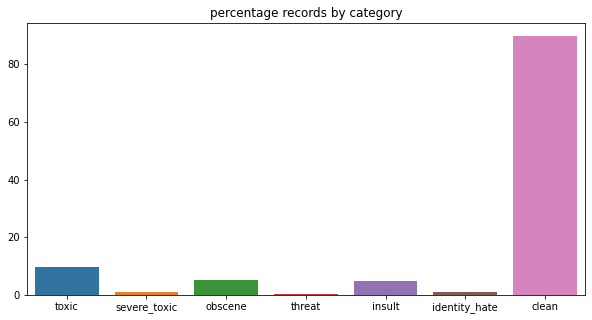

89.83% of the comments are clean i.e., non-toxic


In [7]:
category_percentage(train)
print("{}% of the comments are clean i.e., non-toxic".format(np.round(100*train['clean'].sum()/train.shape[0],2)))

In [9]:
print(pd.crosstab(train['toxic'], train['severe_toxic']))

severe_toxic       0     1
toxic                     
0             144277     0
1              13699  1595


In [22]:
# CLEANING :
train["cleanedtext"] = train["comment_text"].apply(lambda x: x.lower())
display(train.head())

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean,text_clean,cleanedtext
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,1,explanation\nwhy the edits made under my usern...,explanation\nwhy the edits made under my usern...
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,1,d'aww! he matches this background colour I am ...,d'aww! he matches this background colour i'm s...
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,1,"hey man, I am really not trying to edit war. i...","hey man, i'm really not trying to edit war. it..."
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,1,"""\nmore\ni can not make any real suggestions o...","""\nmore\ni can't make any real suggestions on ..."
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,1,"you, sir, are my hero. any chance you remember...","you, sir, are my hero. any chance you remember..."


In [14]:
# Using contractions for english :

!pip install contractions

     |████████████████████████████████| 245kB 14.3MB/s 
     |████████████████████████████████| 317kB 36.5MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.0-cp36-cp36m-linux_x86_64.whl size=81696 sha256=4b0613c7955d73a3837ff2f75c450c2049bce45013cd9e5a862288f7fddef8f8
  Stored in directory: /root/.cache/pip/wheels/0a/90/61/87a55f5b459792fbb2b7ba6b31721b06ff5cf6bde541b40994
Successfully built pyahocorasick


In [23]:
%time
train["cleanedtext"] = train["cleanedtext"].apply(lambda x: contractions.fix(x))

# double check
print(train["comment_text"][67])
print(train["cleanedtext"][67])
print(train["comment_text"][12])
print(train["cleanedtext"][12])

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs
I went there around the same time he did, and that certainly was not the case at the time. Later on they stopped taking children from such a young age.
i went there around the same time he did, and that certainly was not the case at the time. later on they stopped taking children from such a young age.
Hey... what is it..
@ | talk .
What is it... an exclusive group of some WP TALIBANS...who are good at destroying, self-appointed purist who GANG UP any one who asks them questions abt their ANTI-SOCIAL and DESTRUCTIVE (non)-contribution at WP?

Ask Sityush to clean up his behavior than issue me nonsensical warnings...
hey... what is it..
@ | talk .
what is it... an exclusive group of some wp talibans...who are good at destroying, self-appointed purist who gang up any one who asks them questions abt their anti-social and destructive (non)-contribution at wp?

ask sityush to clean up his behavior than issue me nonsensical warn

In [30]:
#NOISE Removal:

def removeURL(comment_text):
   return re.sub(r"https?://\S+|www\.\S+", "", comment_text)
# remove urls from the text
train["cleanedtext"] = train["cleanedtext"].apply(lambda x: removeURL(x))

# double check
print(train["comment_text"][102])
print(train["cleanedtext"][102])
print(train["comment_text"][48])
print(train["cleanedtext"][48])

i can't believe no one has already put up this page Dilbert's Desktop Games so I did
i can not believe no one has already put up this page dilbert's desktop games so i did
"
As for your claims of ""stalking"", that is absolute rubbish and serves only to aggravate the situation. I have assumed good faith (and good intentions) on your part, and have never suggested (or seen reason to suggest) that you might have some ulterior motive in mass-adding links to one specific company's web page. Nor, for that matter, have I ever made any suggestion that this is an ""administrative"" matter or even mentioned such a role. (Clearly, as a party to this disagreement, I would not do so at any rate as it would be a conflict of interest.) I would ask that you thus extend the same good faith toward me, rather than making spurious and unfounded accusations. ''''''chatspy 

"
"
as for your claims of ""stalking"", that is absolute rubbish and serves only to aggravate the situation. i have assumed good fait

In [31]:
# Remove html tags :
def removehtml(comment_text):
   
    html = re.compile(r"<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});")
    return re.sub(html, "", comment_text)
# check:
train["cleanedtext"] = train["cleanedtext"].apply(lambda x: removehtml(x))

# double check
print(train["comment_text"][612])
print(train["cleanedtext"][612])

2010]]
[[User talk:Wikireader41/Archive4|Archive 5-Mar 15
2010]]
[[user talk:wikireader41/archive4|archive 5-mar 15


In [32]:
# Remove NON_ ASCI values :
def non_ascii(comment_text):
    
    return re.sub(r'[^\x00-\x7f]',r'', comment_text)  
# remove non-ascii characters from the text
train["cleanedtext"] = train["cleanedtext"].apply(lambda x: non_ascii(x))

# double check
print(train["comment_text"][38])
print(train["cleanedtext"][38])
print(train["comment_text"][7586])
print(train["cleanedtext"][7586])

Hi Explicit, can you block O Fenian for edit-warring on the Giant's Causeway wp. He has made several edits which can only be described as terrorism.
hi explicit, can you block o fenian for edit-warring on the giant's causeway wp. he has made several edits which can only be described as terrorism.
Points of view do not really come in to it, not mine, not yours, not anyone else's.  Will used MS theory to show that OWLSI could be measured.  Zhang showed the he was wrong.  Zhang shows in his book that MS theory cannot be used to analyse one-way light speed experiments; this is a simple algebraic fact.  Neither Will not anyone else has even claimed that there is an error in Zhang's work let alone found one and, unless and until someone does, it is an indisputable fact that Will was wrong.  The fact that others may have cited Will's original paper cannot change this; maybe they have not read Zhang's analysis.
points of view do not really come in to it, not mine, not yours, not anyone else's.

In [34]:
def specialcharacters(comment_text):
    
    charpattern = re.compile(
        '['
        u'\U0001F600-\U0001F64F'  # emoticons
        u'\U0001F300-\U0001F5FF'  # symbols & pictographs
        u'\U0001F680-\U0001F6FF'  # transport & map symbols
        u'\U0001F1E0-\U0001F1FF'  # flags (iOS)
        u'\U00002702-\U000027B0'
        u'\U000024C2-\U0001F251'
        ']+',
        flags=re.UNICODE)
    return charpattern.sub(r'', comment_text)
%time
# remove non-ascii characters from the text
train["cleanedtext"] = train["comment_text"].apply(lambda x: specialcharacters(x))
display(train.head())

# double check
print(train["comment_text"][11143])
print(train["cleanedtext"][11143])
print(train["comment_text"][1189])
print(train["cleanedtext"][1189])

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.77 µs


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean,text_clean,cleanedtext
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,1,explanation\nwhy the edits made under my usern...,Explanation\nWhy the edits made under my usern...
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,1,d'aww! he matches this background colour I am ...,D'aww! He matches this background colour I'm s...
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,1,"hey man, I am really not trying to edit war. i...","Hey man, I'm really not trying to edit war. It..."
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,1,"""\nmore\ni can not make any real suggestions o...","""\nMore\nI can't make any real suggestions on ..."
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,1,"you, sir, are my hero. any chance you remember...","You, sir, are my hero. Any chance you remember..."


, HIT Entertainment, Lyrick Studios, Connecticut Public Television WNET New York
, HIT Entertainment, Lyrick Studios, Connecticut Public Television WNET New York
"
{| style=""background-color:#F5FFFA; padding:0;"" cellpadding=""0""
|style=""border:1px solid #084080; background-color:#F5FFFA; vertical-align:top; color:#000000;""|
 Hello, ! Welcome to Wikipedia! Thank you for your contributions to this free encyclopedia. If you decide that you need help, check out Getting Help below, ask me on , or place  on your talk page and ask your question there. Please remember to sign your name on talk pages by clicking  or using four tildes (~~~~); this will automatically produce your username and the date. Finally, please do your best to always fill in the edit summary field. Below are some useful links to facilitate your involvement. Happy editing!   
{| width=""100%"" style=""background-color:#F5FFFA;""
|style=""width: 55%; border:1px solid #FFFFFF; background-color:#F5FFFA; vertical-align:top

In [36]:
# Remove PUNCTUATIONS:

def punctuation(comment_text):
  return comment_text.translate(str.maketrans('', '', string.punctuation))

# remove punctuations from the text
train["cleanedtext"] = train["cleanedtext"].apply(lambda x: punctuation(x))

# double check
print(train["comment_text"][5])
print(train["cleanedtext"][5])
print(train["comment_text"][75097])
print(train["cleanedtext"][75097])

"

Congratulations from me as well, use the tools well.  · talk "


Congratulations from me as well use the tools well  · talk 
I hope that this response is helpful.  I apologize, but I'm afraid I do have to include the following disclaimers: 
 This response is not legal advice or a representation of the viewpoints of the Wikimedia Foundation. 
 The legal team can only represent the Wikimedia Foundation on legal matters, so this is not official advice to the community. 
 The legal team cannot provide consultations, and contacting the legal team does not create any confidential relationship. 
 This response is not intended to address a specific factual situation.
I hope that this response is helpful  I apologize but Im afraid I do have to include the following disclaimers 
 This response is not legal advice or a representation of the viewpoints of the Wikimedia Foundation 
 The legal team can only represent the Wikimedia Foundation on legal matters so this is not official advice to the 

In [37]:
## acronyms , abbrevations, etc:

def replacing(comment_text):

  # Typos, slang and other
        sampleslang = {
                                "w/e": "whatever",
                                "usagov": "usa government",
                                "recentlu": "recently",
                                "ph0tos": "photos",
                                "amirite": "am i right",
                                "exp0sed": "exposed",
                                "<3": "love",
                                "luv": "love",
                                "amageddon": "armageddon",
                                "trfc": "traffic",
                                "16yr": "16 year",
                                "b/w":"between",
                                  "ilu":"i love u"
                                }

        # Acronyms
        sampleacronyms =  { 
                            "mh370": "malaysia airlines flight 370",
                            "okwx": "oklahoma city weather",
                            "arwx": "arkansas weather",    
                            "gawx": "georgia weather",  
                            "scwx": "south carolina weather",  
                            "cawx": "california weather",
                            "tnwx": "tennessee weather",
                            "azwx": "arizona weather",  
                            "alwx": "alabama weather",
                            "usnwsgov": "united states national weather service",
                            "2mw": "tomorrow",
                            "tmrw":"tomorrow",
                            "UK":"united kingdom"
                            }

        
        # Some common abbreviations 
        sampleabbrevations = {
                              "$" : " dollar ",
                              "€" : " euro ",
                              "4ao" : "for adults only",
                          "a.m" : "before midday",
                          "a3" : "anytime anywhere anyplace",
                          "aamof" : "as a matter of fact",
                          "acct" : "account",
                          "adih" : "another day in hell",
                          "afaic" : "as far as i am concerned",
                          "afaict" : "as far as i can tell",
                          "afaik" : "as far as i know",
                          "afair" : "as far as i remember",
                          "afk" : "away from keyboard",
                          "app" : "application",
                          "approx" : "approximately",
                          "apps" : "applications",
                          "asap" : "as soon as possible",
                          "asl" : "age, sex, location",
                          "atk" : "at the keyboard",
                          "ave." : "avenue",
                          "aymm" : "are you my mother",
                          "ayor" : "at your own risk", 
                          "b&b" : "bed and breakfast",
                          "b+b" : "bed and breakfast",
                          "b.c" : "before christ",
                          "b2b" : "business to business",
                          "b2c" : "business to customer",
                          "b4" : "before",
                          "b4n" : "bye for now",
                          "b@u" : "back at you",
                          "bae" : "before anyone else",
                          "bak" : "back at keyboard",
                          "bbbg" : "bye bye be good",
                          "bbc" : "british broadcasting corporation",
                          "bbias" : "be back in a second",
                          "bbl" : "be back later",
                          "bbs" : "be back soon",
                          "be4" : "before",
                          "bfn" : "bye for now",
                          "blvd" : "boulevard",
                          "bout" : "about",
                          "brb" : "be right back",
                          "bros" : "brothers",
                          "brt" : "be right there",
                          "bsaaw" : "big smile and a wink",
                          "btw" : "by the way",
                          "bwl" : "bursting with laughter",
                          "c/o" : "care of",
                          "cet" : "central european time",
                          "cf" : "compare",
                          "cia" : "central intelligence agency",
                          "csl" : "can not stop laughing",
                          "cu" : "see you",
                          "cul8r" : "see you later",
                          "cv" : "curriculum vitae",
                          "cwot" : "complete waste of time",
                          "cya" : "see you",
                          "cyt" : "see you tomorrow",
                          "dae" : "does anyone else",
                          "dbmib" : "do not bother me i am busy",
                          "diy" : "do it yourself",
                          "dm" : "direct message",
                          "dwh" : "during work hours",
                          "e123" : "easy as one two three",
                          "eet" : "eastern european time",
                          "eg" : "example",
                          "embm" : "early morning business meeting",
                          "encl" : "enclosed",
                          "encl." : "enclosed",
                          "etc" : "and so on",
                          "faq" : "frequently asked questions",
                          "fawc" : "for anyone who cares",
                          "fb" : "facebook",
                          "fc" : "fingers crossed",
                          "fig" : "figure",
                          "fimh" : "forever in my heart", 
                          "ft." : "feet",
                          "ft" : "featuring",
                          "ftl" : "for the loss",
                          "ftw" : "for the win",
                          "fwiw" : "for what it is worth",
                          "fyi" : "for your information",
                          "g9" : "genius",
                          "gahoy" : "get a hold of yourself",
                          "gal" : "get a life",
                          "gcse" : "general certificate of secondary education",
                          "gfn" : "gone for now",
                          "gg" : "good game",
                          "gl" : "good luck",
                          "glhf" : "good luck have fun",
                          "gmt" : "greenwich mean time",
                          "gmta" : "great minds think alike",
                          "gn" : "good night",
                          "g.o.a.t" : "greatest of all time",
                          "goat" : "greatest of all time",
                          "goi" : "get over it",
                          "gps" : "global positioning system",
                          "gr8" : "great",
                          "gratz" : "congratulations",
                          "gyal" : "girl",
                          "h&c" : "hot and cold",
                          "hp" : "horsepower",
                          "hr" : "hour",
                          "hrh" : "his royal highness",
                          "ht" : "height",
                          "ibrb" : "i will be right back",
                          "ic" : "i see",
                          "icq" : "i seek you",
                          "icymi" : "in case you missed it",
                          "idc" : "i do not care",
                          "idgadf" : "i do not give a damn fuck",
                          "idgaf" : "i do not give a fuck",
                          "idk" : "i do not know",
                          "ie" : "that is",
                          "i.e" : "that is",
                          "ifyp" : "i feel your pain",
                          "IG" : "instagram",
                          "iirc" : "if i remember correctly",
                          "ilu" : "i love you",
                          "ily" : "i love you",
                          "imho" : "in my humble opinion",
                          "imo" : "in my opinion",
                          "imu" : "i miss you",
                          "iow" : "in other words",
                          "irl" : "in real life",
                          "j4f" : "just for fun",
                          "jic" : "just in case",
                          "jk" : "just kidding",
                          "jsyk" : "just so you know",
                          "l8r" : "later",
                          "lb" : "pound",
                          "lbs" : "pounds",
                          "ldr" : "long distance relationship",
                          "lmao" : "laugh my ass off",
                          "lmfao" : "laugh my fucking ass off",
                          "lol" : "laughing out loud",
                          "ltd" : "limited",
                          "ltns" : "long time no see",
                          "m8" : "mate",
                          "mf" : "motherfucker",
                          "mfs" : "motherfuckers",
                          "mfw" : "my face when",
                          "mofo" : "motherfucker",
                          "mph" : "miles per hour",
                          "mr" : "mister",
                          "mrw" : "my reaction when",
                          "ms" : "miss",
                          "mte" : "my thoughts exactly",
                          "nagi" : "not a good idea",
                          "nbc" : "national broadcasting company",
                          "nbd" : "not big deal",
                          "nfs" : "not for sale",
                          "ngl" : "not going to lie",
                          "nhs" : "national health service",
                          "nrn" : "no reply necessary",
                          "nsfl" : "not safe for life",
                          "nsfw" : "not safe for work",
                          "nth" : "nice to have",
                          "nvr" : "never",
                          "nyc" : "new york city",
                          "oc" : "original content",
                          "og" : "original",
                          "ohp" : "overhead projector",
                          "oic" : "oh i see",
                          "omdb" : "over my dead body",
                          "omg" : "oh my god",
                          "omw" : "on my way",
                          "p.a" : "per annum",
                          "p.m" : "after midday",
                          "pm" : "prime minister",
                          "poc" : "people of color",
                          "pov" : "point of view",
                          "pp" : "pages",
                          "ppl" : "people",
                          "prw" : "parents are watching",
                          "ps" : "postscript",
                          "pt" : "point",
                          "ptb" : "please text back",
                          "pto" : "please turn over",
                          "qpsa" : "what happens", #"que pasa",
                          "ratchet" : "rude",
                          "rbtl" : "read between the lines",
                          "rlrt" : "real life retweet", 
                          "rofl" : "rolling on the floor laughing",
                          "roflol" : "rolling on the floor laughing out loud",
                          "rotflmao" : "rolling on the floor laughing my ass off",
                          "rt" : "retweet",
                          "ruok" : "are you ok",
                          "sfw" : "safe for work",
                          "sk8" : "skate",
                          "smh" : "shake my head",
                          "sq" : "square",
                          "srsly" : "seriously", 
                          "ssdd" : "same stuff different day",
                          "tbh" : "to be honest",
                          "tbs" : "tablespooful",
                          "tbsp" : "tablespooful",
                          "tfw" : "that feeling when",
                          "thks" : "thank you",
                          "tho" : "though",
                          "thx" : "thank you",
                          "tia" : "thanks in advance",
                          "til" : "today i learned",
                          "tl;dr" : "too long i did not read",
                          "tldr" : "too long i did not read",
                          "tmb" : "tweet me back",
                          "tntl" : "trying not to laugh",
                          "ttyl" : "talk to you later",
                          "u" : "you",
                          "u2" : "you too",
                          "u4e" : "yours for ever",
                          "utc" : "coordinated universal time",
                          "w/" : "with",
                          "w/o" : "without",
                          "w8" : "wait",
                          "wassup" : "what is up",
                          "wb" : "welcome back",
                          "wtf" : "what the fuck",
                          "wtg" : "way to go",
                          "wtpa" : "where the party at",
                          "wuf" : "where are you from",
                          "wuzup" : "what is up",
                          "wywh" : "wish you were here",
                          "yd" : "yard",
                          "ygtr" : "you got that right",
                          "ynk" : "you never know",
                          "zzz" : "sleeping bored and tired"
                        }
            
        sampleslang_pattern = re.compile(r'(?<!\w)(' + '|'.join(re.escape(key) for key in sampleslang.keys()) + r')(?!\w)')
        sampleacronyms_pattern = re.compile(r'(?<!\w)(' + '|'.join(re.escape(key) for key in sampleacronyms.keys()) + r')(?!\w)')
        sampleabbrevations_pattern = re.compile(r'(?<!\w)(' + '|'.join(re.escape(key) for key in sampleabbrevations.keys()) + r')(?!\w)')
        
        comment_text = sampleslang_pattern.sub(lambda x: sampleslang[x.group()], comment_text)
        comment_text = sampleacronyms_pattern.sub(lambda x: sampleacronyms[x.group()], comment_text)
        comment_text = sampleabbrevations_pattern.sub(lambda x: sampleabbrevations[x.group()], comment_text)
        
        return comment_text
%time

# remove punctuations from the text
train["cleanedtext"] = train["cleanedtext"].apply(lambda x: replacing(x))

# double check
print(train["comment_text"][18844])
print(train["cleanedtext"][18844])
print(train["comment_text"][48409])
print(train["cleanedtext"][48409])


CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.48 µs
"
Works for me, although I would replace noise music by experimental music (his second solo album is best described as such). )  Le Zouave "

Works for me although I would replace noise music by experimental music his second solo album is best described as such   Le Zouave 
KISS-FM is a name used by a large number of Clear Channel Communications radio stations that broadcast the Top-40 format.

Is there a list of these anywhere? The FCC only lists one station with the callsign, in San Antonio: .  01:11, Apr 11, 2004 (UTC)
KISSFM is a name used by a large number of Clear Channel Communications radio stations that broadcast the Top40 format

Is there a list of these anywhere The FCC only lists one station with the callsign in San Antonio   0111 Apr 11 2004 UTC


In [38]:
pip install textblob

In [41]:
# SPELLING CHECK:

# Testing a line : EXAMPLE

print("Test: ", TextBlob("I amm tooo hungeryy get me someethings to have and controol this").correct())



Test:  I am took hungry get me something to have and control this


In [44]:
pip install punkt

ERROR: Could not find a version that satisfies the requirement punkt (from versions: none)
ERROR: No matching distribution found for punkt


In [21]:
## PRE- PROCESSING:

# Tokenizing the  texts.
train['tokenized'] = train["cleanedtext"].apply(word_tokenize)
train.head()

KeyError: ignored